We want test if TensorFlow does have the ability to fit any function.

We choose `y=(x-1)^2` as an example.

# Simulate data 

X ranges from -5 ~ 100

In [107]:
import numpy as np
n = 105
x = [i-5 for i in range(0,n,1)]
# y = [(i-1)*(i-1) for i in x]
y = [pow(i,3)+100*pow(i-30,2) for i in x]
# add noise 
y = [i+np.random.normal(0,1) for i in y]
print(x)
print(y)

[-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
[122376.22360950132, 115535.71147986248, 108871.3943561214, 102391.11626746134, 96099.08343722891, 89998.93678357328, 84100.92238758321, 78408.59559261645, 72927.76906455852, 67663.52539418977, 62625.38102899994, 57815.66138819535, 53242.08649977478, 48913.63976570725, 44827.576612211335, 40999.35639840882, 37430.46916634825, 34127.49732481659, 31097.698875533686, 28341.907272757944, 25874.729977646024, 23695.245956432038, 21813.190581823128, 20232.392488437785, 18958.00155160556, 18000.59213169165, 17361.068637723376, 17047.426914869277, 17067.270931794654, 17424.541683444706, 1812

# Split date
We want have a trainning dataset(60%) and a test dataset(40%).

In [108]:
import random
order = list(range(0,n,1))
random.shuffle(order)

train_size = int(n*0.6)
test_size = int(n*0.4)

train_x = [[x[i]] for i in order[:train_size]]
train_y = [[y[i]] for i in order[:train_size]]



test_x = [[x[i]] for i in order[-test_size:]]
test_y = [[y[i]] for i in order[-test_size:]]

print(len(train_x)+len(test_x))

105


# Train model

In [92]:
import tensorflow as tf

## Linear regression

`y=wx+b` 

w(1\*1) b(1\*1)

In [109]:
graph = tf.Graph()
with graph.as_default(), tf.device('/cpu:0'):
    inputs = tf.placeholder(tf.float32, shape=[train_size,1])
    labels = tf.placeholder(tf.float32, shape=[train_size,1])
    
    w = tf.Variable(tf.random_uniform([ 1,1],-0.1,0.1, dtype=tf.float32))
    b = tf.Variable(tf.zeros([1]))
    
    def the_model(x):
        logits = tf.matmul(x,w)+b
        return logits
    
    estimated_labels = the_model(inputs)
    loss = tf.reduce_mean(tf.squared_difference(estimated_labels, labels))
    
    optimizer = tf.train.AdagradOptimizer(0.5).minimize(loss)

In [125]:
n_step = 30000
with tf.Session(graph=graph) as session:
    tf.global_variables_initializer().run()
    for i in range(n_step):
        feed_dict = {inputs: train_x, labels: train_y}
        _, _loss, _estimated_labels = session.run([optimizer,loss,estimated_labels],feed_dict = feed_dict)
        if i % 1000 == 0:
            print(_loss)
    print(_loss)

3.12457e+11
4.87994e+10
4.7096e+10
4.56354e+10
4.40108e+10
4.18622e+10
3.87587e+10
3.43018e+10
2.86145e+10
2.24167e+10
1.6996e+10
1.27548e+10
9.57152e+09
7.44377e+09
6.02722e+09
5.07158e+09
4.3568e+09
3.84138e+09
3.54389e+09
3.38138e+09
3.29634e+09
3.25327e+09
3.23195e+09
3.19465e+09
3.17127e+09
3.16503e+09
3.15313e+09
3.15004e+09
3.14849e+09
3.14771e+09
3.13258e+09


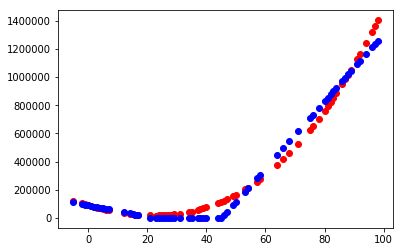

In [126]:
import matplotlib.pyplot as plt

def plot(x,y,_y):
    plt.plot([i[0] for i in x], [i[0] for i in y], 'ro')
    plt.plot([i[0] for i in x], [i[0] for i in _y], 'bo')
    plt.show()

plot(train_x, train_y, _estimated_labels)
# for i in range(train_size):
#     print("%f %f" %(train_y[i][0],_estimated_labels[i][0]))

# Full conntected 

`y=w_1*relu(w_0*x+b_0)+b_1`

In [ ]:
size_layer_0 = 3

graph = tf.Graph()
with graph.as_default(), tf.device('/cpu:0'):
    inputs = tf.placeholder(tf.float32, shape=[train_size,1])
    labels = tf.placeholder(tf.float32, shape=[train_size,1])
    
    w0 = tf.Variable(tf.random_uniform([ 1,size_layer_0],-0.1,0.1, dtype=tf.float32))
    b0 = tf.Variable(tf.zeros([size_layer_0])) 
    
    w1 = tf.Variable(tf.random_uniform([ size_layer_0, 1],-0.1,0.1, dtype=tf.float32))
    b1 = tf.Variable(tf.zeros([1]))
    
    def the_model(x):
        logits = tf.matmul(x,w0)+b0
        logits = tf.nn.relu(logits)
        logits = tf.matmul(logits,w1)+b1
        return logits
    
    estimated_labels = the_model(inputs)
    loss = tf.reduce_mean(tf.squared_difference(estimated_labels, labels))
    
    optimizer = tf.train.AdagradOptimizer(0.5).minimize(loss)

`y=w_2*(w_1*relu(w_0*x+b_0)+b_1)+b_2`

In [124]:
size_layer_0 = 3
size_layer_1 = 3

graph = tf.Graph()
with graph.as_default(), tf.device('/cpu:0'):
    inputs = tf.placeholder(tf.float32, shape=[train_size,1])
    labels = tf.placeholder(tf.float32, shape=[train_size,1])
    
    w0 = tf.Variable(tf.random_uniform([ 1,size_layer_0],-0.1,0.1, dtype=tf.float32))
    b0 = tf.Variable(tf.zeros([size_layer_0])) 
    
    w1 = tf.Variable(tf.random_uniform([ size_layer_0, size_layer_1],-0.1,0.1, dtype=tf.float32))
    b1 = tf.Variable(tf.zeros([size_layer_1]))
    
    w2 = tf.Variable(tf.random_uniform([ size_layer_1, 1],-0.1,0.1, dtype=tf.float32))
    b2 = tf.Variable(tf.zeros([1]))    
    
    def the_model(x):
        logits = tf.matmul(x,w0)+b0
        logits = tf.nn.relu(logits)
        logits = tf.matmul(logits,w1)+b1
        logits = tf.nn.relu(logits)
        logits = tf.matmul(logits,w2)+b2
        return logits
    
    estimated_labels = the_model(inputs)
    loss = tf.reduce_mean(tf.squared_difference(estimated_labels, labels))
    
    optimizer = tf.train.AdagradOptimizer(0.5).minimize(loss)